# Data analysis with python

## Index

1. [Importing libraries](#1)
1. [loading dataset](#2)
1. [define objectives](#3)
1. [data cleaning](#5)
1. [data analysis](#6)
1. [data interpretation and visuasilation](#7)
1. [classification model for IRIS dataset](#9)

## <a id="1">importing Libraries</a>

In [75]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import ttest_ind, norm, zscore

We will be using following libraries:

- pandas to work with tabular data
- scikit learn to get toy datasets and classification models
- numpy for scientific calculations

## <a id="2">Loading Dataset</a>

We are going to explore the iris dataset and analyse it using stastical tools

In [2]:
iris = datasets.load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [4]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['type'] = iris.target

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df.drop('type', axis=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## <a id="3">Define Objectives</a>

We want to study the relationship between the type of iris and the dimensions of their sepals and petals.

## <a id="5">Data cleaning</a>

- find and remove duplicate values
- handle null values
- remove outliers

### Find outliers

<Axes: >

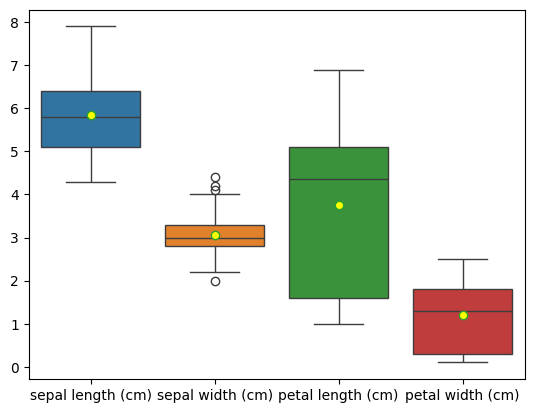

In [10]:
sns.boxplot(df.iloc[:,:-2], showmeans=True, meanprops={"marker":"o", "markerfacecolor":"yellow"})

we have identified outliers in the `sepal width`

In [11]:
z_scores = zscore(df.iloc[:, :-2])

In [12]:
z_scores

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [13]:
outliers = z_scores[z_scores > 3]
outliers = outliers.dropna(axis=0, how='all')
outliers

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
15,NaN,3.090775,NaN,NaN


In [14]:
df.shape

(150, 6)

In [15]:
df.drop(df.index[15], inplace=True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [16]:
df.shape

(149, 6)

### Find duplicate values

In [17]:
duplicate = df[df.duplicated()]
duplicate

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,species
142,5.8,2.7,5.1,1.9,2,virginica


In [18]:
df = df.drop_duplicates()
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


The IRIS dataset contained a duplicate row and we removed it using a pandas dataframe `drop_duplicates()` method

## <a id="6">Data analysis</a>

we will perform following studies on the given data
- find correlation between variables
- draw insights
- find patterns and trends
- classification

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  148 non-null    float64
 1   sepal width (cm)   148 non-null    float64
 2   petal length (cm)  148 non-null    float64
 3   petal width (cm)   148 non-null    float64
 4   type               148 non-null    int64  
 5   species            148 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 8.1+ KB


In [20]:
df.iloc[:,:-2].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.118391,0.877173,0.822521
sepal width (cm),-0.118391,1.000000,-0.415208,-0.353936
petal length (cm),0.877173,-0.415208,1.000000,0.962610
petal width (cm),0.822521,-0.353936,0.962610,1.000000


<Axes: >

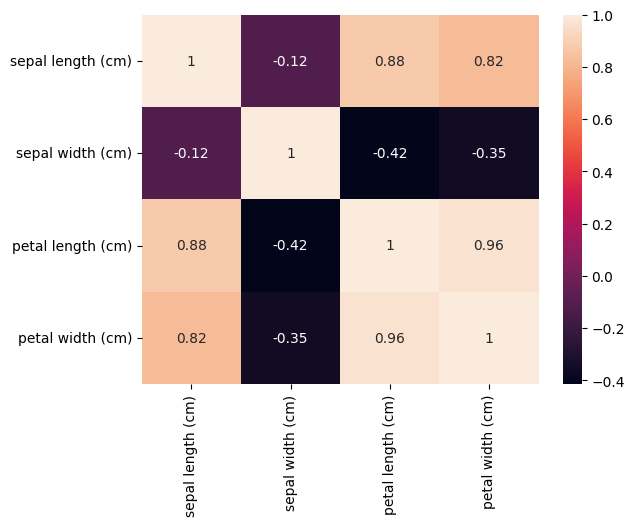

In [21]:
correlation = df.iloc[:,:-2].corr()
sns.heatmap(correlation, annot=True)

## <a id="7">data interpretation and visualisation</a>

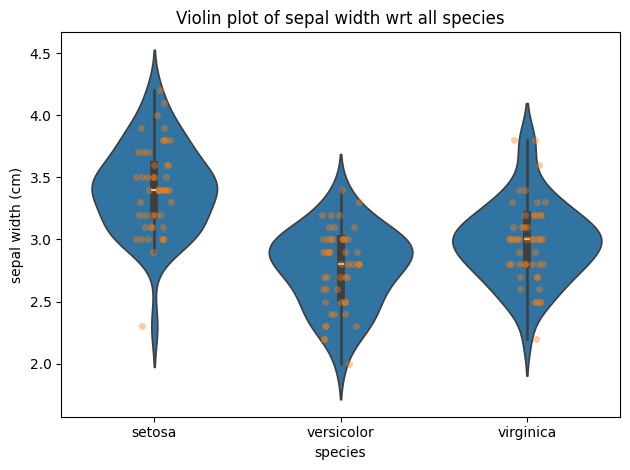

In [55]:
sns.violinplot(x='species', y="sepal width (cm)", data=df)
sns.stripplot(x='species', y="sepal width (cm)", data=df, alpha=0.4)
plt.title("Violin plot of sepal width wrt all species")
plt.tight_layout()

In [22]:
def plot_violin(y2,i):
    plt.subplot(2,2,i)
    
    sns.violinplot(x='species', y=y2, data=df)  
    sns.stripplot(x='species', y=y2, data=df, color='yellow', alpha=0.4, jitter=True)

    plt.title(y2 + ' distribution by species')

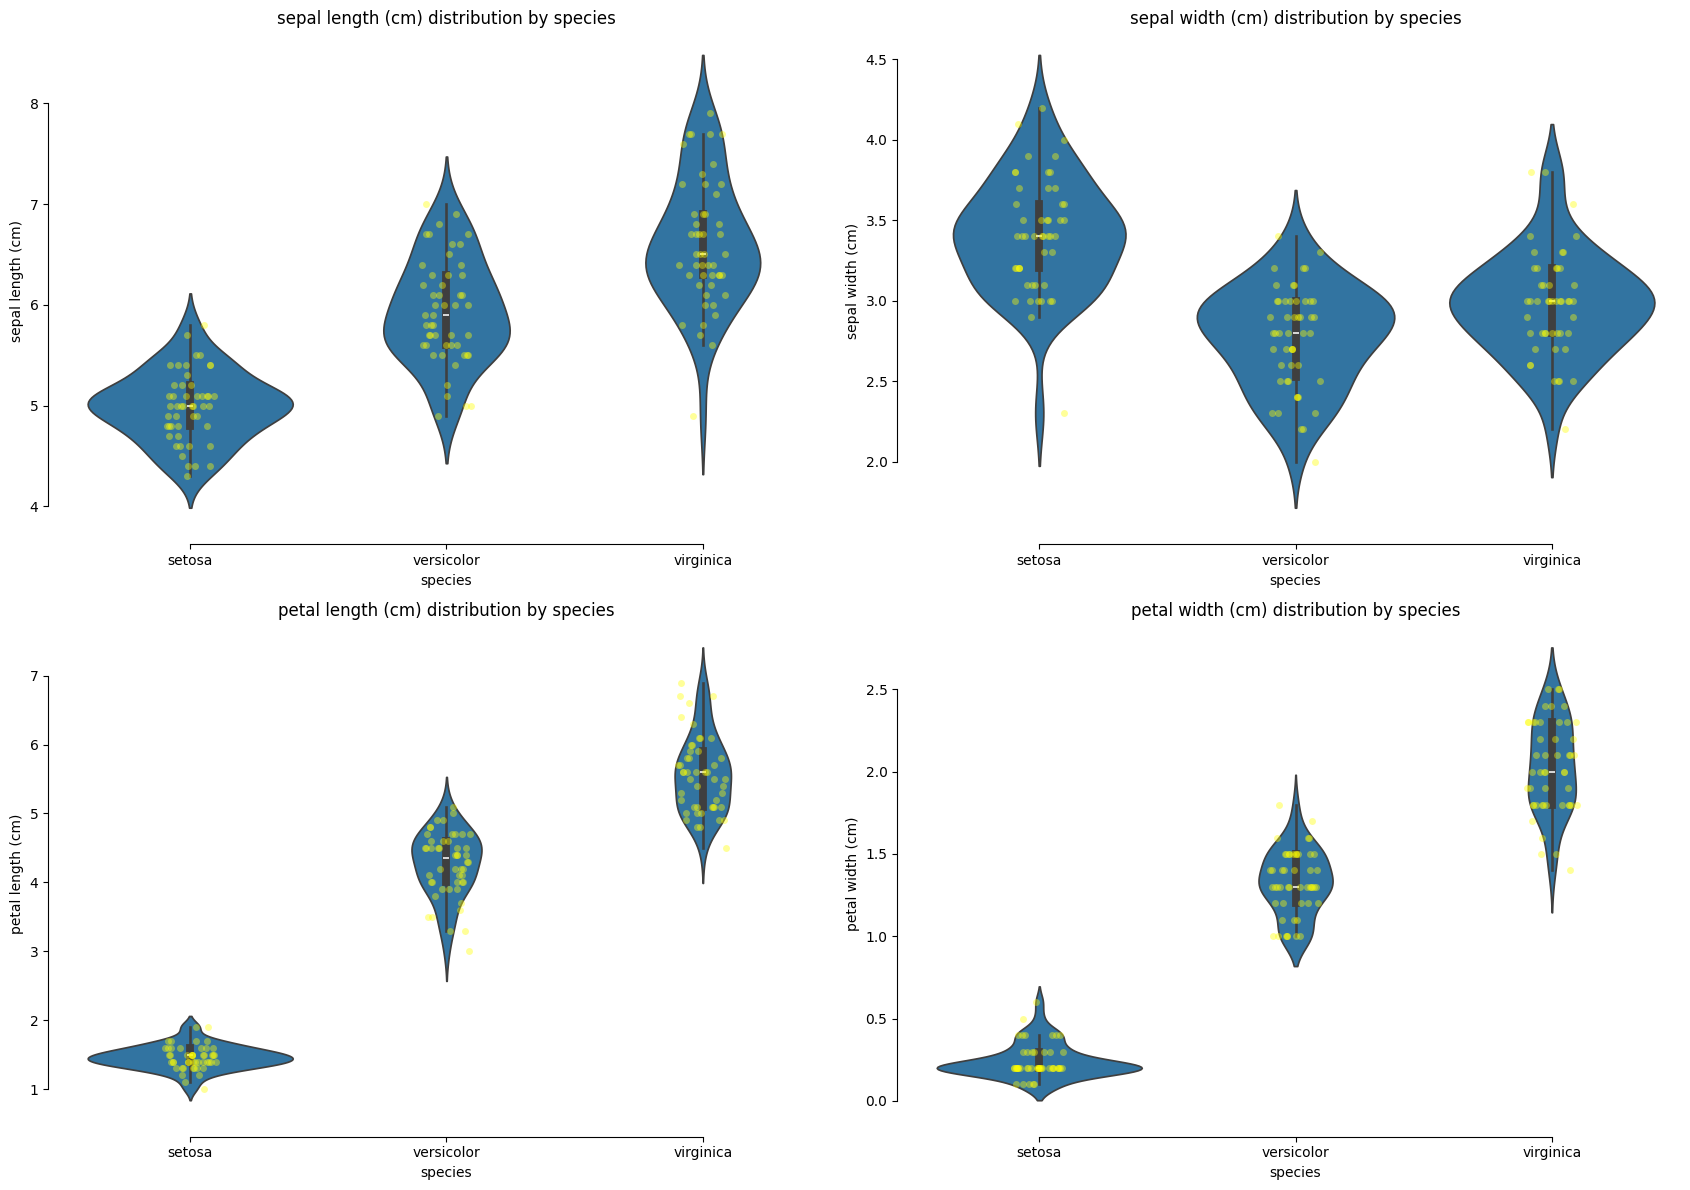

In [23]:
plt.figure(figsize=(17, 12))
i = 1
for measurement in df.columns[:-2]:
    plot_violin(measurement, i)
    sns.despine(offset=10, trim=True)
    i += 1

plt.tight_layout()
plt.show()

## Hypothesis testing

In [24]:
df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,species
107,7.3,2.9,6.3,1.8,2,virginica
130,7.4,2.8,6.1,1.9,2,virginica
19,5.1,3.8,1.5,0.3,0,setosa
127,6.1,3.0,4.9,1.8,2,virginica
54,6.5,2.8,4.6,1.5,1,versicolor
120,6.9,3.2,5.7,2.3,2,virginica
95,5.7,3.0,4.2,1.2,1,versicolor
87,6.3,2.3,4.4,1.3,1,versicolor
84,5.4,3.0,4.5,1.5,1,versicolor
104,6.5,3.0,5.8,2.2,2,virginica


In [25]:
def iris_t_test(species1, species2, feature):
    species1_data = df[df["species"] == species1][feature]
    species2_data = df[df["species"] == species2][feature]

    if species1_data.isna().sum() > 0 or species2_data.isna().sum() > 0:
        raise ValueError("Data contains NaN values. Please clean the data before performing the T-test.")
    
    if len(species1_data) == 0 or len(species2_data) == 0:
        raise ValueError("One or both groups have no data points.")
    
    if species1_data.nunique() == 1 or species2_data.nunique() == 1:
        raise ValueError("One or both groups have identical data points, leading to zero variance.")
    t_stat, p_value = stats.ttest_ind(species1_data, species2_data, equal_var=False)

    return t_stat, p_value

In [26]:
species_list = ['setosa', 'versicolor', 'virginica']
features_list = iris.feature_names

results = []

for i in range(len(species_list)):
    for j in range(i + 1, len(species_list)):
        species1 = species_list[i]
        species2 = species_list[j]
        for feature in features_list:
            t_stat, p_value = iris_t_test(species1, species2, feature)
            null_hypothesis_rejected = p_value < 0.05
            result = {
                'species 1': species1,
                'species 2': species2,
                'feature': feature,
                'null hypothesis rejected': null_hypothesis_rejected,
                'pval': p_value,
                'tval': t_stat
            }
            results.append(result)

results_df = pd.DataFrame(results)

results_df

,species 1,species 2,feature,null hypothesis rejected,pval,tval
0,setosa,versicolor,sepal length (cm),True,1.537265e-17,-10.754002
1,setosa,versicolor,sepal width (cm),True,2.385825e-15,9.457610
2,setosa,versicolor,petal length (cm),True,6.441354e-46,-39.407585
3,setosa,versicolor,petal width (cm),True,2.621238e-47,-34.197127
4,setosa,virginica,sepal length (cm),True,3.037484e-25,-15.708503
5,setosa,virginica,sepal width (cm),True,1.211002e-08,6.239535
6,setosa,virginica,petal length (cm),True,8.086450e-49,-49.413260
7,setosa,virginica,petal width (cm),True,4.809079e-47,-42.257713
8,versicolor,virginica,sepal length (cm),True,1.122667e-07,-5.753540
9,versicolor,virginica,sepal width (cm),True,1.481667e-03,-3.271851


In [35]:
f_stat, p_value = stats.f_oneway(df[df['species'] == 'setosa']['sepal width (cm)'],
                                  df[df['species'] == 'versicolor']['sepal width (cm)'],
                                  df[df['species'] == 'virginica']['sepal width (cm)'])

print(f'ANOVA: F-statistic = {f_stat}, P-value = {p_value}')

ANOVA: F-statistic = 47.57919677267202, P-value = 1.2974536374654334e-16


## <a id="8">classification model for IRIS dataset</a>

In [60]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
y = df['type']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [62]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Confusion matrix

In [66]:
cmt = confusion_matrix(y_test, y_pred)
cmt

array([[15,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  9]])

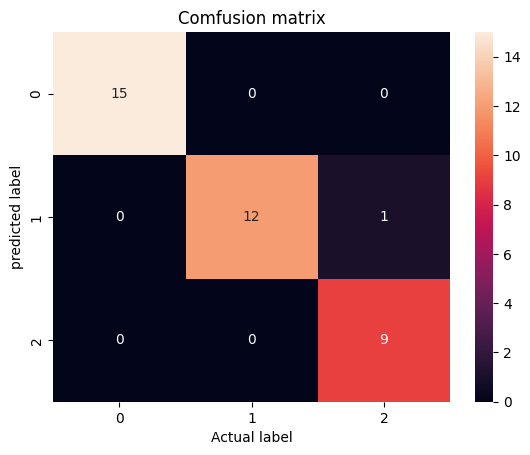

In [74]:
sns.heatmap(cmt, annot=True)
plt.ylabel("predicted label")
plt.xlabel("Actual label")
plt.title("Comfusion matrix")
plt.show()

In [78]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [83]:
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.92      0.96        13
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        37
   macro avg       0.97      0.97      0.97        37
weighted avg       0.98      0.97      0.97        37



### Evaluating model

In [64]:
y_pred = knn.predict(X_test)

In [65]:
print(f'model accuracy with k=3 is: {knn.score(X_test, y_test)}')

model accuracy with k=3 is: 0.972972972972973


In [45]:
df.to_csv('iris.csv', index=False)